# 线性判别分析

## 基本原理

- 判别分析的目的是得到体现分类的函数关系式，即判别函数
- 基本思想是在已知观测对象的分类和特征变量值的前提下，从中筛选出能提供较多信息的变量，并建立判别函数
- 目标是使得到的判别函数在对观测量进行判别其所属类别时的错判率最小 
- 判别函数的一般形式是：
$$ Y = a_1x_1 + a_2x_2 + \dots + a_nx_n \tag{1}$$
其中， $Y$ 为判别函数判别值；$x_1 , x_2 , \dots , x_n$ 为反映研究对象特征的变量； $a_1 , a_2 , \dots , a_n $ 为各变量的系数，即判别系数

- 常用的判别法有 **距离判别法**、**Fisher判别法** 和 **Bayes判别法**



### 距离判别法

对于二分类样本，假定两总体协差矩阵相等
计算步骤如下：
1. 计算两类样本均值: $\bar{X_1}$ 和 $\bar{X_2}$
2. 计算样本协差矩阵，从而求出 $\hat{\Sigma }$
    $$ S_i = \sum_{a=1}^{n}(X_{a}^{(i)}-\bar{X_i})(X_{a}^{(i)}-\bar{X_i})^T   ,\: \:  i=1,2  \tag{2} $$
    $$ \hat{\Sigma } = \frac{S_1+S_2}{n_1+n_2-2}   \tag{3} $$
3. 求线性判别函数 $W(X)$:
    解线性方程组 $\hat{\Sigma }a = \bar{X_1} - \bar{X_2}$ 得：
    $$ a = \hat{\Sigma }^{-1}(\bar{X_1} - \bar{X_2})  \tag{4} $$
    $$ W(X) = a^T(X-\bar{X}) = a^T \left [ X - \frac{1}{2} ( \bar{X}^{(1)} + \bar{X}^{(2)}) \right] \tag{5} $$
4. 对样品判别分类:
    $$ y =\left\{\begin{matrix}
     1 \; \;   if\;  W(X) > 0 \\
     0 \; \;   if\;  W(X) \leq 0
    \end{matrix}\right.  \tag{6} $$
5. 对判别效果作检验

    判别分析是假设两组样品取自不同总体，如果两个总体的均值向量在统计上差异不显著，作判别分析意义就不大：所谓判别效果的检验就是检验两个正态总体的均值向量是否相等，取检验的统计量为：
    $$ F = \frac{(n_1+n_2-2)-p+1}{(n_1+n_2-2)p} T^2 \sim F(p, n_1+n_2 - p-1) \tag{7} $$
    $$ T^2 = (n_1+n_2-2) \left[\sqrt{\frac{n_1n_2}{n_1+n_2}}(\bar{X}^{(1)} - \bar{X}^{(2)})^TS^{-1} \cdot \sqrt{\frac{n_1n_2}{n_1+n_2}}(\bar{X}^{(1)} - \bar{X}^{(2)}) \right] \tag{8}$$

### Bayes判别分析

1. 和距离判别法相似，计算两类样本均值: $\bar{X_1}$ 和 $\bar{X_2}$ 和计算样本协差矩阵，求出 $\hat{\Sigma }$
2. 计算每组样本比例 $q_1$ 和 $q_2$:
    $$ q_i = \frac{n_i}{n}, \; \; i=1,2 \tag{9} $$
3. 代人判别函数：
    $$ y(g/x) = \ln{q_g} - \frac{1}{2}\mu^{(g)T}\Sigma^{-1}\mu^{(g)} + X^T\Sigma^{-1}\mu^{(g)} \tag{10} $$
4. 判别准则为：
    $$ y =\left\{\begin{matrix}
     1 \; \;   if\;  f_1(X) > f_2(X) \\
     0 \; \;   if\;  f_1(X) \leq f_2(X)
    \end{matrix}\right.  \tag{11} $$

### Fisher判别分析

1. 利用公式 (4) 和公式 (5) 计算得到Fisher判别函数的系数 $c_1,c_2,\dots,c_n$
2. 计算判别临界值 $y_0$:
    $$ \bar{y}^{(i)} = \sum_{k=1}^{n}c_k\bar{x}_{k}^{(i)}, \;\; i=1,2 \tag{12} $$
    $$ y_0 = \frac{n_1\bar{y}^{(1)} + n_2\bar{y}^{(2)}}{n_1+n_2} \tag{13} $$
3. 判别准则为：
    $$ \left \{ \begin{matrix} 
    &当 y > y_0 时, &\;\;  X \in G_1 \\
    &当 y < y_0 时, &\;\;  X \in G_2 \\
    &当 y= y_0 时,  &\;\; 待判 
    \end{matrix} \right. \tag{14} $$
4. 根据公式(7)计算 $F$ 统计量对判别效果作检验


## 实例分析
以Iris数据为例。Iris数据集是常用的分类实验数据集，由Fisher, 1936收集整理。Iris也称鸢尾花卉数据集，是一类多重变量分析的数据集。数据集包含150个数据集，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

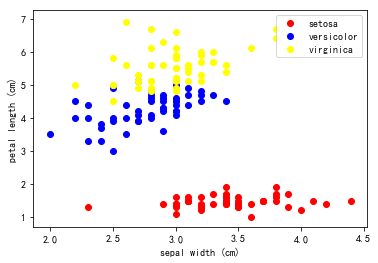

In [6]:
colors = ['red', 'blue', 'yellow']
for i, color in zip(np.unique(y), colors):
    plt.scatter(X[y==i, 1], X[y==i, 2], c=color, label=target_names[i])

plt.xlabel(feature_names[1])
plt.ylabel(feature_names[2])
plt.legend()
plt.show()

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X[:,[1,2]], y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

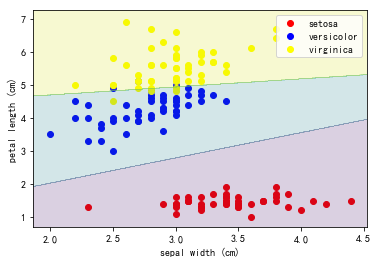

In [7]:
colors = ['red', 'blue', 'yellow']
for i, color in zip(np.unique(y), colors):
    plt.scatter(X[y==i, 1], X[y==i, 2], c=color, label=target_names[i])

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 1000), np.linspace(ymin, ymax, 1000))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

plt.xlabel(feature_names[1])
plt.ylabel(feature_names[2])
plt.legend()
plt.show()